<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/VanishingGradientProblemInANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vanishing Gradient Problem[VGP]-**

VGP is observed generally in Deep Neural Network wherein we have multiple hidden layer in the model architecture. VGP arises when you use sigmoid or tanh type of activation function.

Consider a deep neural network having 10 hidden layer with sigmoid activation function at each node. Sigmoid activation function gives output in the range of 0 to 1. For updating the weight and bias values of this architecture having 10 hidden layer, we will have to mutiply 10 partial derivative whose values are very low which lies between 0 to 1. So if we multiply 10 numbers with 0 to 1 range then the output we will get is very less. So if output is very low the change in weight and bias value will also be loss. In some case this change is so less that there is no significant change in the parameter values. If we are not getting any change in parameter and we keep updating the weight and bias values,it is not feasible. This problem is known as Vanishing Gradient Problem.

**How to Recognize the VGP-**

1) We will get loss after each epoch,if there is no change in loss then it is a sign of VGP

2) Draw a graph of any Weight value vs Epoch. If the graph is consistent then there is no change happeningi weight values which means there is VGP.

In [53]:
#Importing dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [54]:
x,y = make_moons(n_samples=250,noise=0.25,random_state=42)
#n_samples means generate 250 data points
#noise = 0.85 adds gaussian noise to make dataset more scattered.
#Higher value of noise makes the dataset more scattered.
#Random_state = 42 means everytime we split the dataset , it will get splitted the same


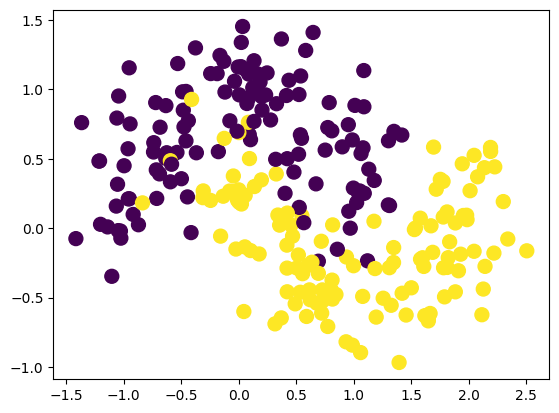

In [55]:
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.show()

In [56]:
#MOdel defination
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
old_weights = model.get_weights()[0]
#Here we are storing the 1st layer weights in old_weights

In [59]:
old_weights

array([[ 0.4538266 ,  0.3596632 ,  0.5150158 ,  0.63512415, -0.47638515,
         0.26323473, -0.06775409,  0.5148106 , -0.23100603,  0.24119598],
       [-0.04177088, -0.03288126, -0.23529676,  0.42363816,  0.13177496,
        -0.20364076, -0.11520422, -0.36217496, -0.12697363,  0.31838113]],
      dtype=float32)

In [60]:
#Splitting the dataset in training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [61]:
model.fit(x_train,y_train,epochs =50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5184 - loss: 0.6927
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4968 - loss: 0.6946
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4933 - loss: 0.6941 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5185 - loss: 0.6925 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5266 - loss: 0.6921 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5198 - loss: 0.6925 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4979 - loss: 0.6935 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5222 - loss: 0.6924 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5274 - loss: 0.6922 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5201 - loss: 0.6926 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5041 - loss: 0.6932 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5420 - loss: 0.6928 
E

Here it is observed in the loss value that there is no change happening in loss value. It is keeping constant at 0.69 somewhere.It means after every epoch, there is no considerable change happening in weight and bias values.And thus we can conclude that there is Vanishing Gradient Problem hapening in this neural network while training.

**How to handle Vanishing Gradient Problem?**

1)Reduce model complexity-

Reducing the model complexity means we can use less number of hidden layers.This is not that applicable because we are changing the deep neural network architecture and it is not suggested generally to change the deep neural network architecture.To see this process works or not, we can reduce the number of hidden layer in above neural network and observe the changes.

2)Using ReLu activation function-

Output of ReLu is max(0,z) . It means its output range is from 0 to z . So when we differentiate output of ReLU activation function, we will get the value either 0 or 1 And when we multiply multiple 1's we wont see any type of vanishing gradient problem which was occuring due to multiplying multiple less than 1 values. There is one problem in using ReLu activation function of Vanishing Gradient Problem is that if the derivation is 0 then we wont be getting any updated weight and bias values.To resolve this 0 derivation problem , we got introduced to Leaky ReLU activation function.

3)Proper Weight Initialization Technique-

There are 2 weight initialization techniques called Glorat and Xavier.

4)Batch Normalization-

 Batch Normalization helps stabalize and accelerate training by normalizing inputs to each layer.It normalizes activations of each layer to 0 mean and unit variance,preventing extremely small or large values that could cause vanishing gradient problem.

5)Using a Residual Network - (ResNet)

ResNet is build using Residual Block.ResNet is a topic in Convolutional Neural Network.

**Exploding Gradient Network-**

Exploding Gradinet Problem is seen basically in Recurrent Neural Network.When we have nubers greater than 1 and multiply it. We will get the very value value. If we go onto update the weight and bias value with this very high value of gradient,updation in weight and bias value will be random and as a result our model will start working randomly and our loss will not decrease.This is the Exploding Gradient Problem. This problem is exactly the oposite of Vanishing Gradient Problem.